<a href="https://colab.research.google.com/github/ValdazoAmerico/Machine-Learning_Seguros-para-autos/blob/main/Car_insurance_sales_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('a.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
data.shape

(9134, 24)

In [ ]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
len(data)

9134

In [ ]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

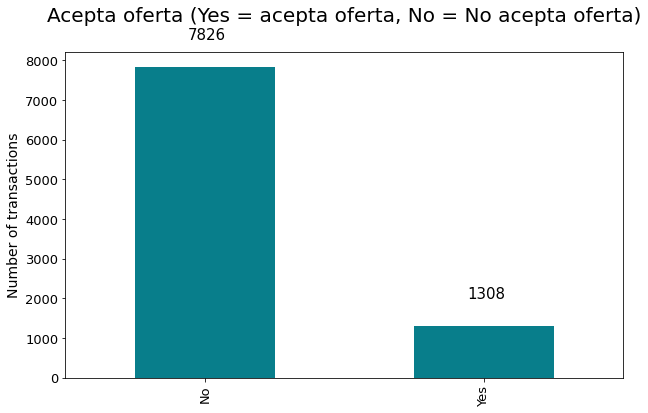

In [ ]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color="#087E8B")
ax.set_title('Acepta oferta (Yes = acepta oferta, No = No acepta oferta)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() +700, str(round(i.get_height(), 2)), fontsize=15)

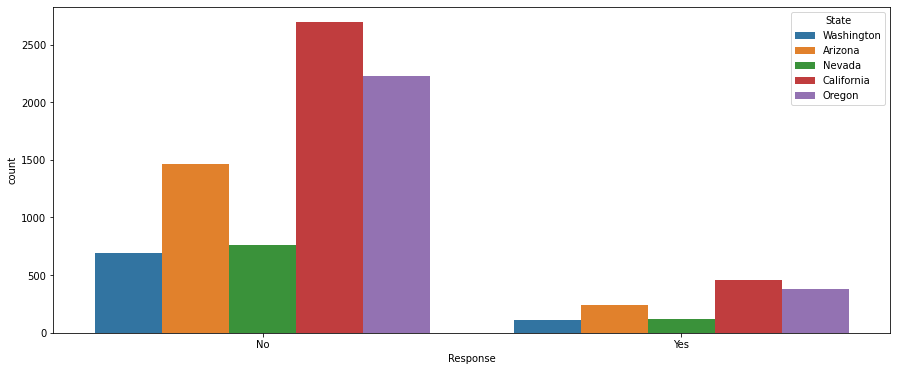

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
sns.countplot("Response", hue="State", data = data)

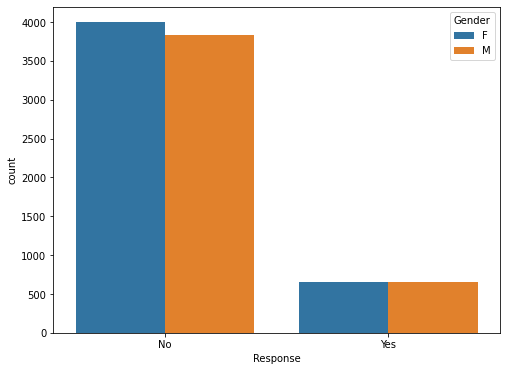

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot("Response", hue="Gender", data=data)

In [ ]:
data = data.drop(columns={"Customer", "Policy","Effective To Date"})

In [ ]:
#Creamos una lista de variables categoricas

data_categorical = data.select_dtypes(include=['object'])
categories = list(data_categorical.columns)
categories

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [ ]:
## Convertimos las variables categoricas en numericas empleando LabelEncoder
lb = LabelEncoder()

for i in categories:
  data[i] = lb.fit_transform(data[i])

In [ ]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1


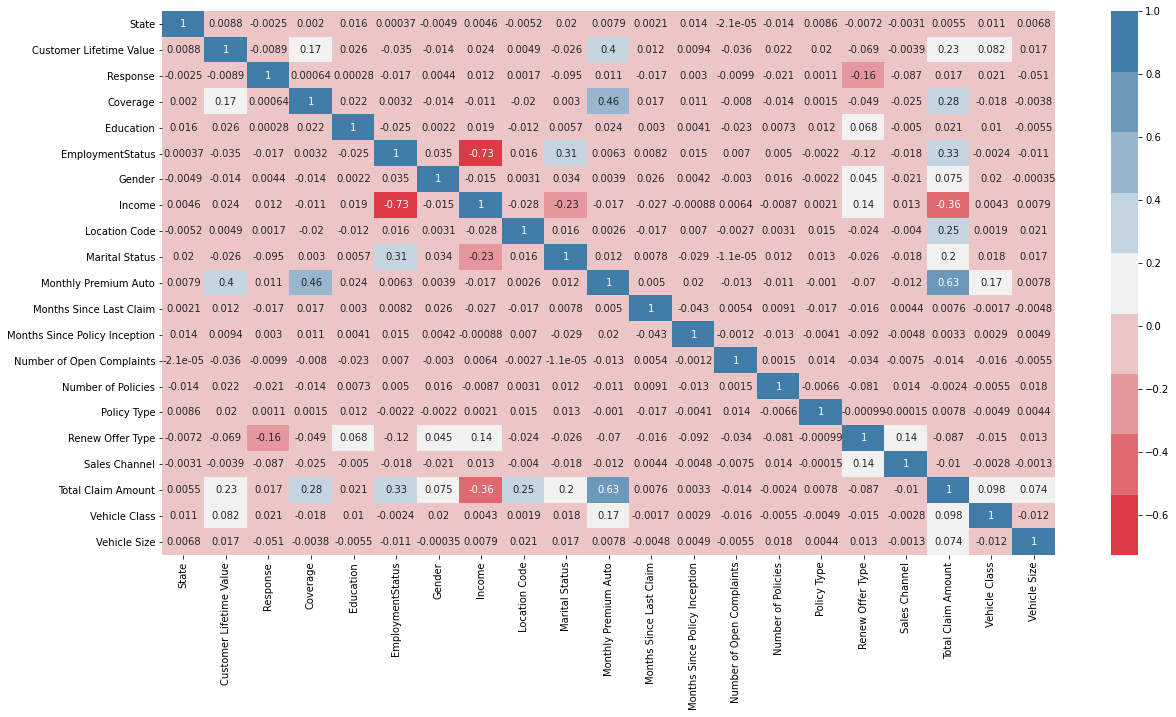

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(data.corr(), annot=True, cmap=cmap)

In [ ]:
##Supervised Machine Learning para datos no balanceados

In [ ]:
y = data["Response"]
X = data.drop(["Response"], axis=1)

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [ ]:
lr = LogisticRegression()

model_logistica=lr.fit(X_train,y_train)

y_pred = model_logistica.predict(X_test)

acc = lr.score(X_test,y_test)*100

print("Logistic Regression Test Accuracy", round(acc, 2), "%")

Logistic Regression Test Accuracy 84.95 %


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print("2 neighbors KNN Score: ", round(acc,2), "%")

2 neighbors KNN Score:  96.93 %


In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

[[1501   51]
 [   5  270]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1552
           1       0.84      0.98      0.91       275

    accuracy                           0.97      1827
   macro avg       0.92      0.97      0.94      1827
weighted avg       0.97      0.97      0.97      1827

0.9693486590038314


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svc=svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print("SVM Algorithm Test Accuracy", round(acc, 2), "%")

SVM Algorithm Test Accuracy 84.95 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print("Decision Tree Test Accuracy", round(acc, 2), "%")

Decision Tree Test Accuracy 96.33 %


In [ ]:
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))

[[1490   62]
 [   5  270]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1552
           1       0.81      0.98      0.89       275

    accuracy                           0.96      1827
   macro avg       0.90      0.97      0.93      1827
weighted avg       0.97      0.96      0.96      1827

0.963327859879584


In [ ]:
##Supervised Machine Learning para datos balanceados

In [ ]:
X_down = pd.concat([X_train, y_train], axis=1)

no_effect = X_down[X_down.Response==0]
effect = X_down[X_down.Response==1]

no_effect_downsampled = resample(no_effect,
                                 replace = False,
                                 n_samples = len(effect),
                                 random_state = 27)

downsampled = pd.concat([no_effect_downsampled, effect])

downsampled.Response.value_counts()

1    1033
0    1033
Name: Response, dtype: int64

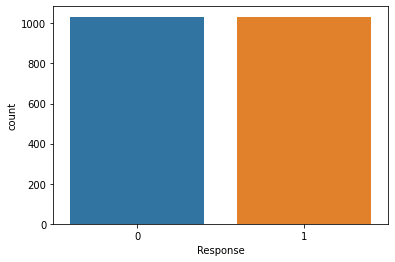

In [ ]:
sns.countplot(downsampled['Response'])

In [ ]:
downsampled.shape

(2066, 21)

In [ ]:
y_train_down = downsampled.Response
X_train_down = downsampled.drop(['Response'], axis=1)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_down,y_train_down)

y_pred1 = lr.predict(X_test)

acc = lr.score(X_test,y_test)*100

print("Logistic Regression Test Accuracy", round(acc, 2), "%")

Logistic Regression Test Accuracy 51.18 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=1

knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(X_train_down, y_train_down)

y_pred2 = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100

print("Prediction: ",y_pred2[:5])
print(n_neighbors, "neighbors KNN Score: ", round(acc,2), "%")

Prediction:  [0 0 0 0 0]
1 neighbors KNN Score:  85.06 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_down, y_train_down)

y_pred_dtc3 = dtc.predict(X_test)




acc = dtc.score(X_test, y_test)*100
print("Decision Tree Test Accuracy", round(acc, 2), "%")

Decision Tree Test Accuracy 86.75 %
